In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv("C:/Users/admin/Downloads/auto_data.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
# top 5 records
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
# bottom 5 records
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [12]:
numeric_columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
numeric_df = df[numeric_columns]


In [14]:
correlation_matrix = df.corr(numeric_only=True)


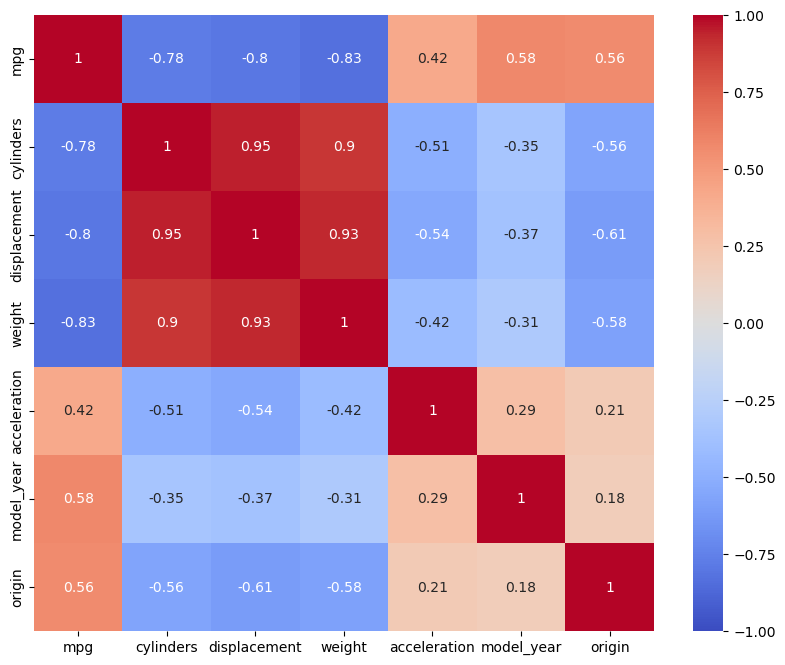

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [18]:
selected_headers = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]


In [19]:
mean_values = df[selected_headers].mean()


C:\Users\admin\AppData\Local\Temp\ipykernel_13268\413795752.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df[selected_headers].mean()


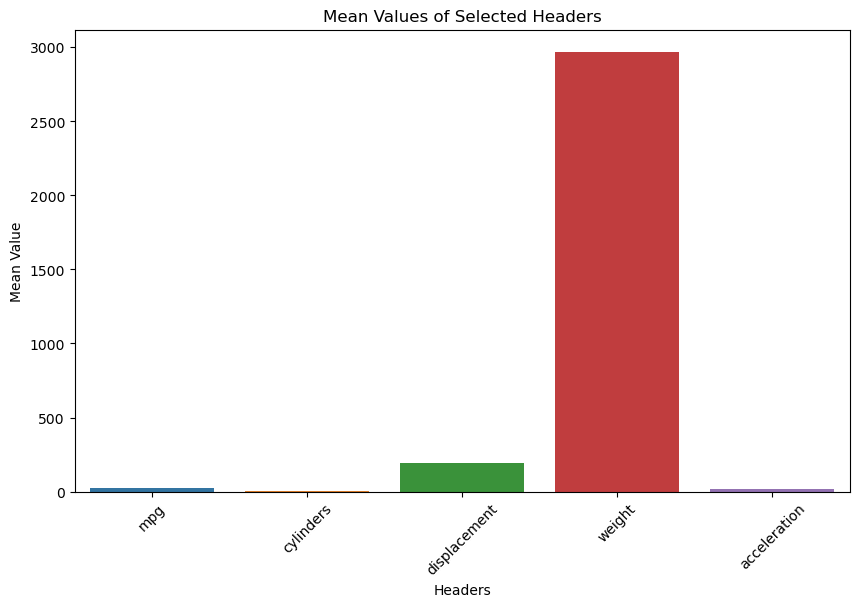

In [20]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_values.index, y=mean_values.values)
plt.title("Mean Values of Selected Headers")
plt.xticks(rotation=45)
plt.xlabel("Headers")
plt.ylabel("Mean Value")
plt.show()

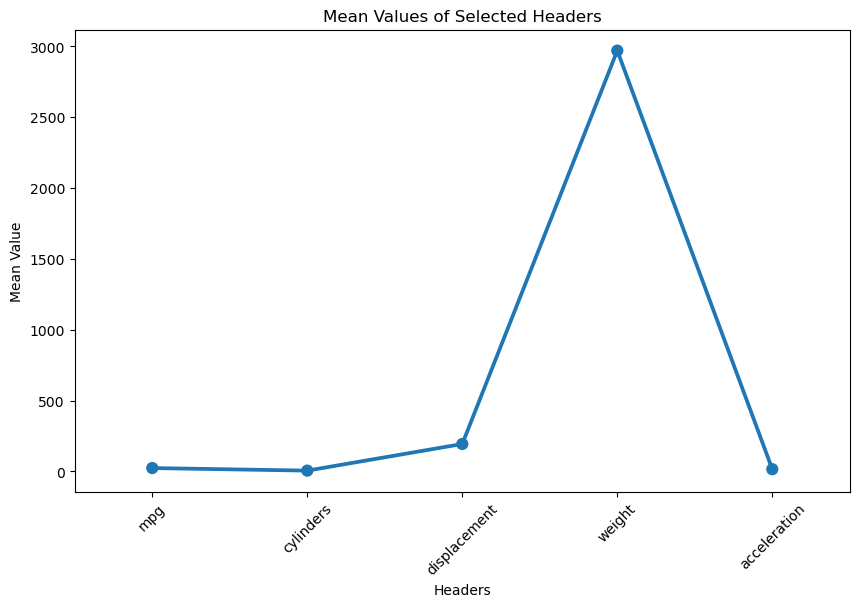

In [21]:
# Point Plot
plt.figure(figsize=(10, 6))
sns.pointplot(x=mean_values.index, y=mean_values.values)
plt.title("Mean Values of Selected Headers")
plt.xticks(rotation=45)
plt.xlabel("Headers")
plt.ylabel("Mean Value")
plt.show()

In [22]:
selected_columns = ["mpg", "weight", "origin"]


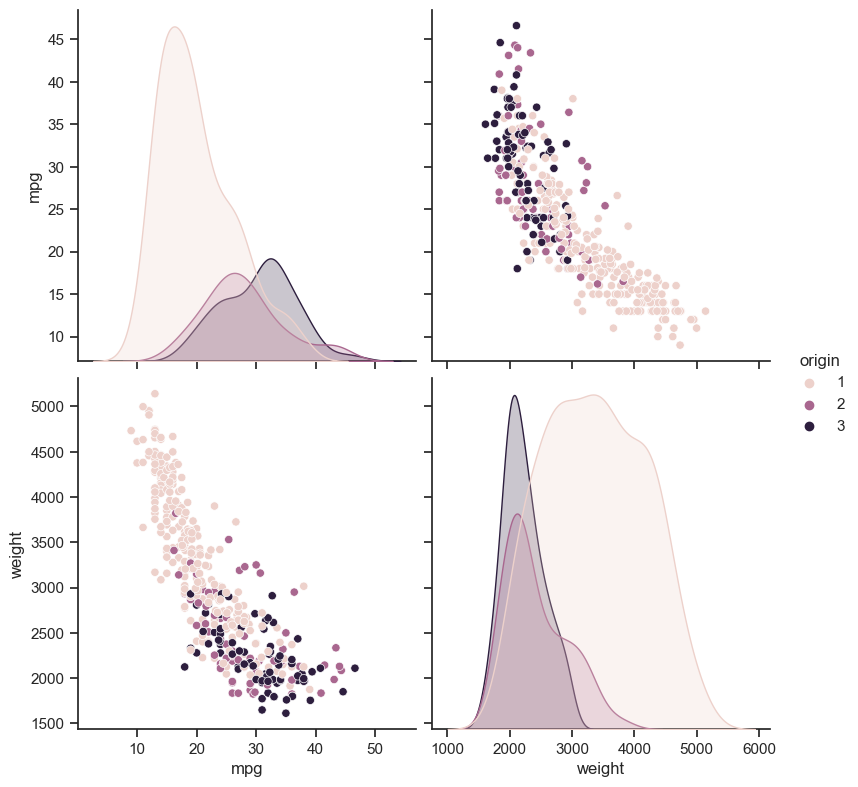

In [25]:
sns.set(style="ticks")
sns.pairplot(df[selected_columns], hue="origin", height=4)
plt.show()

In [27]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


In [28]:
filtered_data = df[(df['acceleration'] > 15) & (df['horsepower'] < 170)]


In [29]:
selected_names = filtered_data['name']
print(selected_names)

15                  plymouth duster
16                       amc hornet
17                    ford maverick
19     volkswagen 1131 deluxe sedan
20                      peugeot 504
                   ...             
392                chevrolet camaro
393                 ford mustang gl
394                       vw pickup
396                     ford ranger
397                      chevy s-10
Name: name, Length: 211, dtype: object


In [31]:
cylinder_counts = df['cylinders'].value_counts()
print(cylinder_counts)

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


In [32]:
vehicles_per_year = df['model_year'].value_counts()
print(vehicles_per_year)

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64
